In [18]:
import soundfile as sf
import torch
import librosa
from transformers import Wav2Vec2ForMaskedLM, Wav2Vec2Tokenizer
from transformers import Wav2Vec2Tokenizer,Wav2Vec2Processor, Wav2Vec2CTCTokenizer, Wav2Vec2ForCTC
import numpy as np
from librosa import display
import matplotlib.pyplot as plt

tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")

In [14]:
# load pretrained model
model = Wav2Vec2ForCTC.from_pretrained("D:\\Downloads\\NeuralNets\\wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\Downloads\NeuralNets\wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
tokenizerL = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-large-960h")
modelL = Wav2Vec2ForCTC.from_pretrained("D:\\Downloads\\NeuralNets\\wav2vec2-large-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\Downloads\NeuralNets\wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
modelXL = Wav2Vec2ForCTC.from_pretrained("D:\\Downloads\\NeuralNets\\wav2vec2-large-960h-lv60-self")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\Downloads\NeuralNets\wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
speech, rate = librosa.load("D:\\Downloads\\NeuralNets\\deepspeech\dinobird.wav",sr=16000)

In [8]:
[(x - np.mean(speech[:10])) / np.sqrt(np.var(speech[:10]) + 1e-5) for x in speech[:10]]

[-0.0019298710948572853,
 -0.0019298710948572853,
 -0.0019298710948572853,
 -0.0019298710948572853,
 -0.021228582187216738,
 0.017368839134782574,
 -0.01157922685671691,
 0.017368839134782574,
 -0.021228582187216738,
 0.0270181944652824]

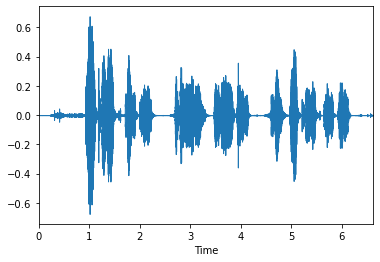

In [9]:
librosa.display.waveplot(y=speech)

In [10]:
librosa.effects.split(speech, top_db = 40)

array([[  6144,  50688],
       [ 56832,  74240],
       [ 75776,  92672],
       [ 98304, 136704]])

In [21]:
input_values = tokenizer(speech, return_tensors = 'pt').input_values

#Store logits (non-normalized predictions)
logits = model(input_values).logits

#Store predicted id's
predicted_ids = torch.argmax(logits, dim =-1)

#decode the audio to generate text
transcript = tokenizer.decode(predicted_ids[0])

In [23]:
transcript

'ARCHIOP TEREXS THE DYNASOL IS KNOWN AS THE ARCHIOP TYREXS'

In [22]:
input_values = tokenizer(speech, return_tensors = 'pt').input_values

#Store logits (non-normalized predictions)
logits = modelL(input_values).logits

#Store predicted id's
predicted_ids = torch.argmax(logits, dim =-1)

#decode the audio to generate text
tokenizerL.decode(predicted_ids[0])

'ARCHIOPTERIX THE DYNUSO IS KNOWN AS THE ARCHIOPTEREX'

In [24]:
input_values = tokenizer(speech, return_tensors = 'pt').input_values

#Store logits (non-normalized predictions)
logits = modelXL(input_values).logits

#Store predicted id's
predicted_ids = torch.argmax(logits, dim =-1)

#decode the audio to generate text
tokenizer.decode(predicted_ids[0])

'ARCHEOPTERIC THE DINOSAUR IS KNOWN AS THE ARCHEOPTERI'

In [ ]:
import onnx
from onnxruntime.quantization import quantize_dynamic
from pathlib import Path

In [ ]:
_ = torch.onnx.export(
        modelXL,
        input_values,
        "D:\\Downloads\\NeuralNets\\wav2vec2-large-960h-lv60-self\\wav2vec2-large-960h-lv60-self.onnx",
        export_params=True,
        opset_version=12,
        input_names=['input_values'],
        output_names=['logits'],
        dynamic_axes={
           'input_values': {0:'batch',1:'sequence'},
           'logits': {0: 'batch',1:'sequence'}})

In [ ]:
quantize_dynamic("D:\\Downloads\\NeuralNets\\wav2vec2-large-960h-lv60-self\\wav2vec2-large-960h-lv60-self.onnx", "D:\\Downloads\\NeuralNets\\wav2vec2-large-960h-lv60-self\\wav2vec2-large-960h-lv60-self-quantized.onnx")